# Procesamiento de imagen y vídeo
## Introducción a OpenCV
###### _José Luis Garrido Labrador_


### Lectura, espacios de color y escritura

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bgr = cv2.imread('images/imcl17.jpg',1)
hsv = cv2.cvtColor(bgr,cv2.COLOR_BGR2HSV_FULL)
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

np.max(hsv[:,:,0])

255

In [3]:
cv2.imwrite('images/prueba.jpg',bgr)

True

### Tipo de datos

### Brillo

Introduzca un brillo entre -255 y 255: 25


<function matplotlib.pyplot.show(*args, **kw)>

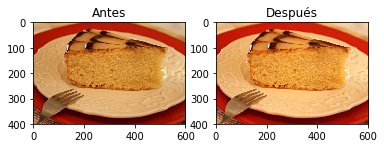

In [4]:
#Antes
plt.figure()
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title("Antes")

#Cambio de brillo
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV) #Convertir la imagen a hsv
h, s, v = cv2.split(hsv) #Extraer las capas en variables distintas
valor = int(input("Introduzca un brillo entre -255 y 255: "))
if valor > 0:
    lim = 255 - valor #valor es el brillo a aumentar
    v[v>lim] = 255
    v[v<=lim] += valor
else:
    lim = 0 + np.abs(valor) #valor es el brillo a disminuir
    v[v<lim] = 0
    v[v>=lim] -= np.abs(valor)

final = cv2.merge((h,s,v))
rgb = cv2.cvtColor(final, cv2.COLOR_HSV2RGB)

#Después
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.title("Después")
plt.show

### Histograma

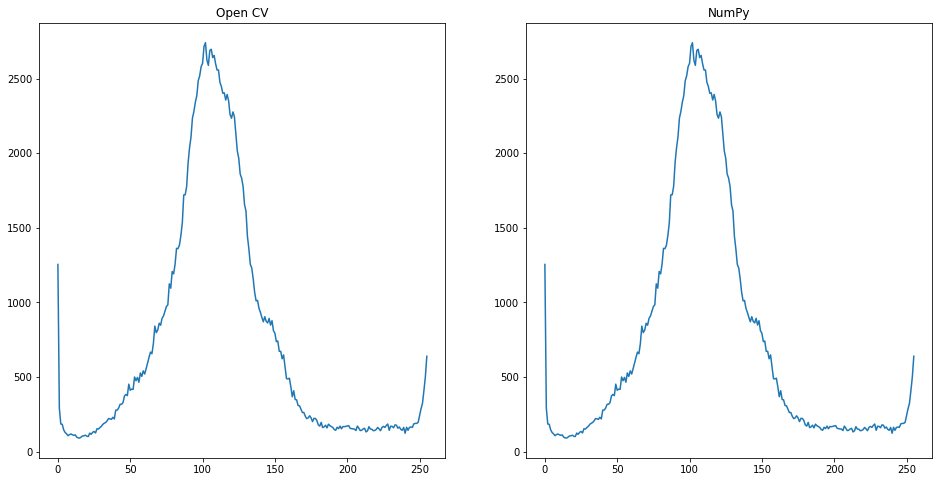

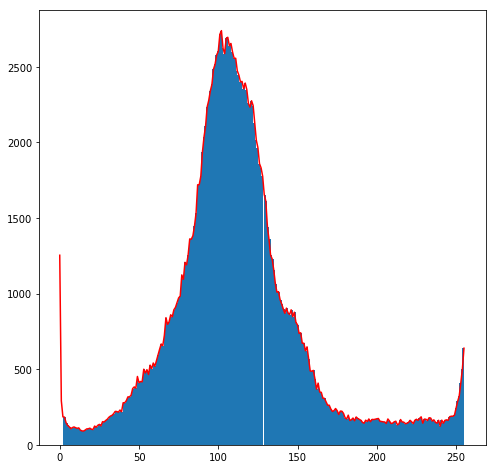

In [5]:
img = cv2.imread('images/imbn02.jpg',0)

histCV = cv2.calcHist([img],[0],None,[256],[0,256])
histNP,bins = np.histogram(img.ravel(),256,[0,256])

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.plot(histCV)
plt.title("Open CV")
plt.subplot(1,2,2)
plt.plot(histNP)
plt.title("NumPy")

plt.figure(figsize=(8,8))
hist = plt.hist(img.ravel(),256,[2,256])
plt.plot(histNP,'r')

### Ecualización

Text(0.5, 1.0, 'Histograma')

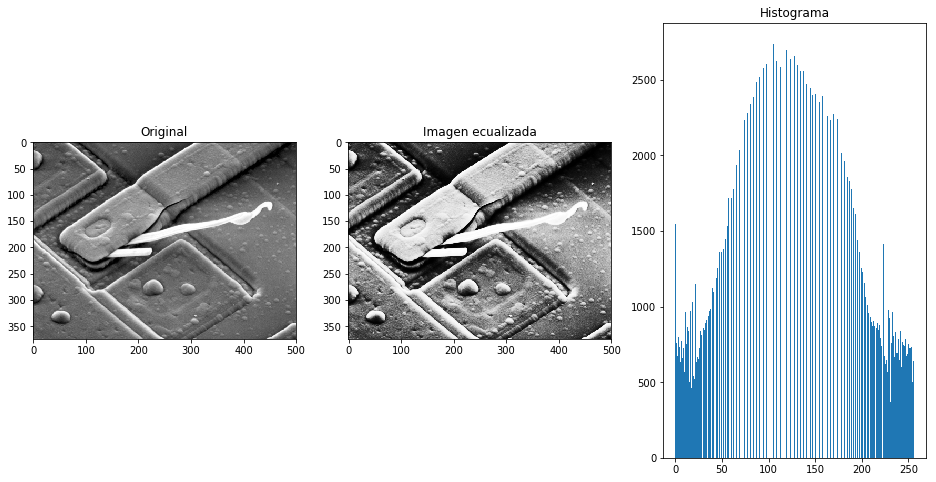

In [6]:
ecualizado = cv2.equalizeHist(img);

plt.figure(figsize=(16, 8))
plt.subplot(1,3,1);
plt.imshow(img, cmap='gray');
plt.title('Original');
plt.subplot(1,3,2);
plt.imshow(ecualizado, cmap='gray');
plt.title('Imagen ecualizada');
plt.subplot(1,3,3);
plt.hist(ecualizado.ravel(),256,[0,256]);
plt.title('Histograma')

### Filtrado

Text(0.5, 1.0, 'Filtrado')

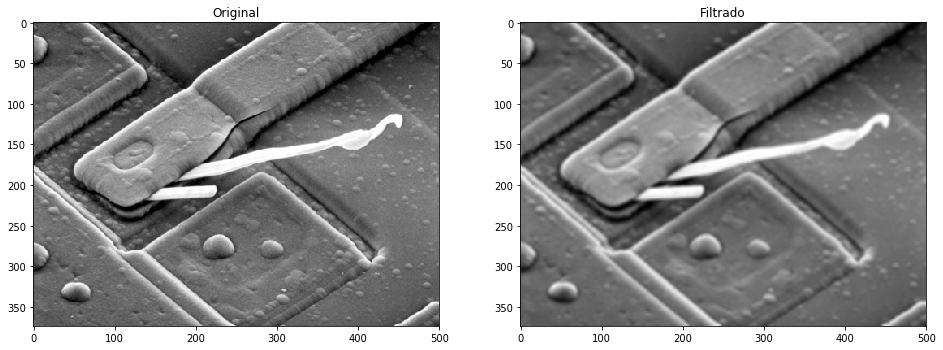

In [7]:
#Filtro genérico
kernel = np.ones((5,5),np.float32)/50
dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')
plt.title("Filtrado")

Text(0.5, 1.0, 'Filtrado')

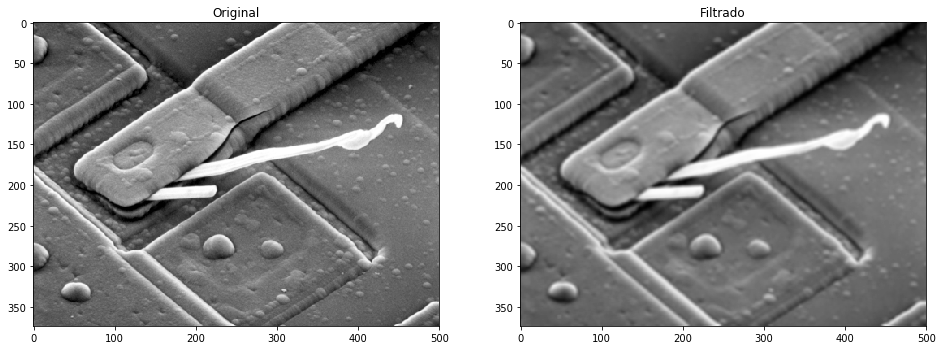

In [8]:
#Gaussiano

dst = cv2.GaussianBlur(img,(5,5),5,5)

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')
plt.title("Filtrado")

#### Gradiente

Text(0.5, 1.0, 'Sobel')

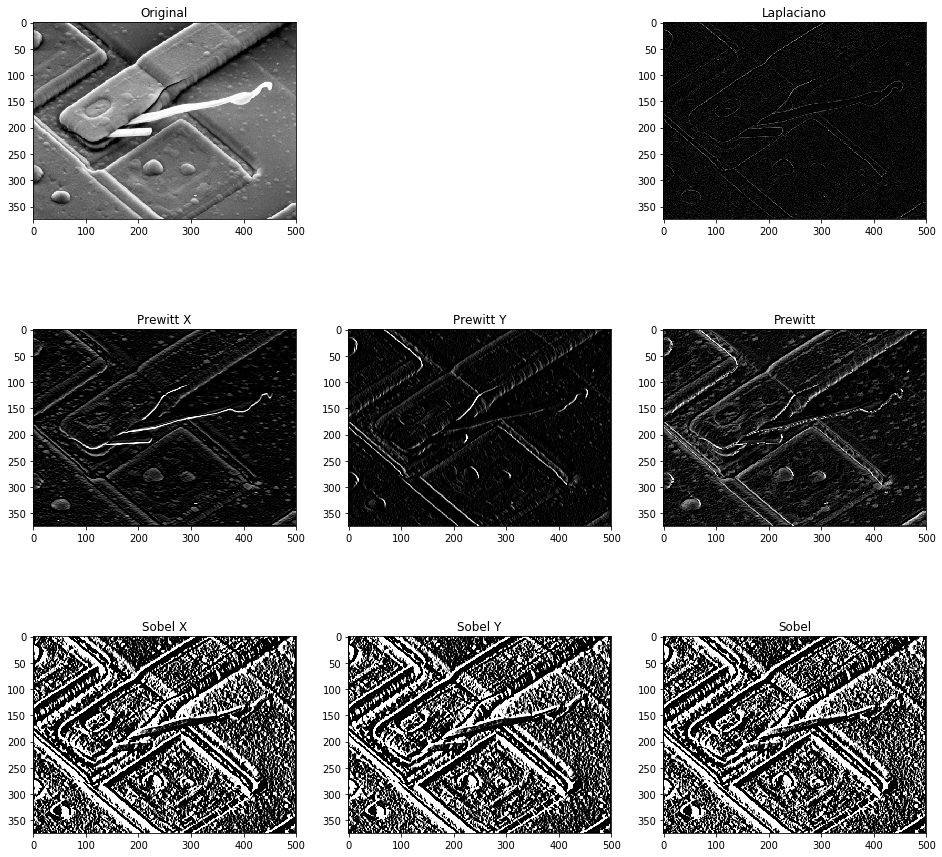

In [9]:
# Prewitt
Hx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
Hy = np.transpose(Hx)
Px = cv2.filter2D(img,-1,Hx)
Py = cv2.filter2D(img,-1,Hy)
prewitt = Px+Py
# Sobel
Sx = cv2.Sobel(img,-1,1,0,ksize=5)
Sy = cv2.Sobel(img,-1,1,0,ksize=5)
sobel = Sx+Sy
# Laplaciano
laplaciano = cv2.Laplacian(img,-1,delta=5)

plt.figure(figsize=(16, 16))
plt.subplot(3,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(3,3,3)
plt.imshow(laplaciano, cmap='gray')
plt.title("Laplaciano")

plt.subplot(3,3,4)
plt.imshow(Px, cmap='gray')
plt.title("Prewitt X")
plt.subplot(3,3,5)
plt.imshow(Py, cmap='gray')
plt.title("Prewitt Y")
plt.subplot(3,3,6)
plt.imshow(prewitt, cmap='gray')
plt.title("Prewitt")

plt.subplot(3,3,7)
plt.imshow(Sx, cmap='gray')
plt.title("Sobel X")
plt.subplot(3,3,8)
plt.imshow(Sy, cmap='gray')
plt.title("Sobel Y")
plt.subplot(3,3,9)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel")

Text(0.5, 1.0, 'Laplaciano')

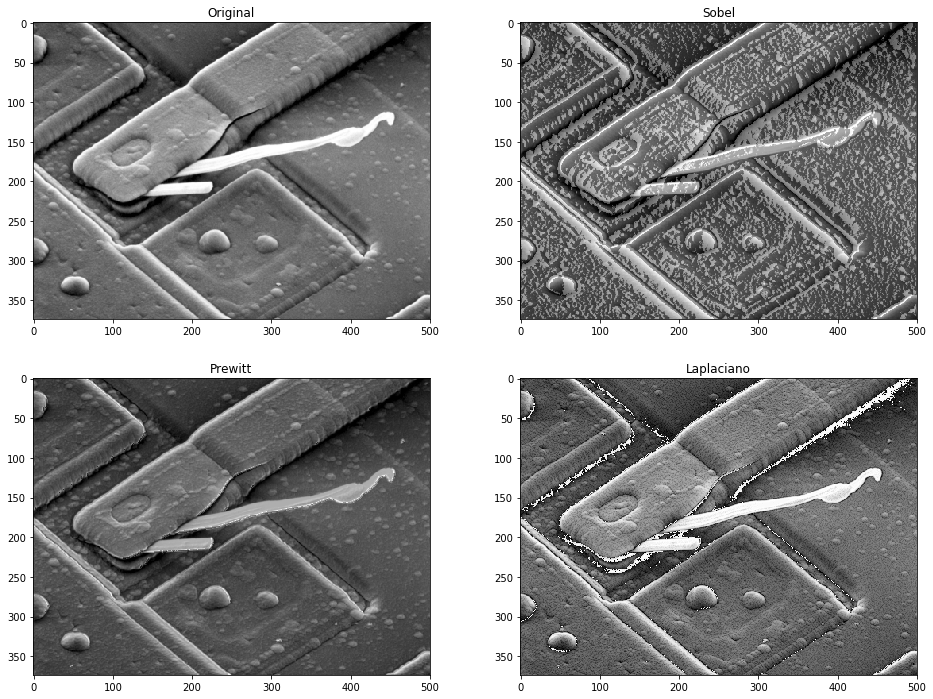

In [10]:
#Realzado:
preImg = img + prewitt/2
sobImg = img + sobel/2
lapImg = img - laplaciano

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(sobImg,cmap='gray')
plt.title('Sobel')

plt.subplot(2,2,3)
plt.imshow(preImg,cmap='gray')
plt.title('Prewitt')

plt.subplot(2,2,4)
plt.imshow(lapImg,cmap='gray')
plt.title('Laplaciano')